In [33]:
# All imports required throughout the file are listed here
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [34]:
# Load in the data
overview_df = pd.read_csv("../data/overview_data_cleaned.csv")
specific_df = pd.read_csv("../data/specific_data_cleaned.csv")

display(overview_df)
display(specific_df)

,App Name,Vulnerabilities,Storage,Crypto,Auth,Network,Platform,Code,Resilience,Privacy
0,Androgoat,24,7.0,1.0,1.0,4.0,7.0,1.0,2.0,1.0
1,DIVA,13,5.0,NaN,5.0,NaN,NaN,3.0,NaN,NaN
2,InsecureBankv2,25,4.0,2.0,4.0,1.0,8.0,1.0,5.0,NaN
3,Hacking Playground Android App,15,5.0,1.0,NaN,1.0,3.0,3.0,2.0,NaN
4,OVAA,18,1.0,1.0,NaN,NaN,10.0,6.0,NaN,NaN
5,InsecureShop,19,2.0,NaN,2.0,1.0,13.0,NaN,1.0,NaN
6,Finstergram,5,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN
7,BugBazaar,43,7.0,NaN,1.0,NaN,23.0,9.0,3.0,NaN


,App Name,MASVS Category,Vulnerability,MASVS Counterpart
0,Androgoat,Storage,Insecure Data Storage – Shared Prefs - 1,MASWE-0006: Sensitive Data Stored Unencrypted ...
1,Androgoat,Storage,Insecure Data Storage - Shared Prefs - 2,MASWE-0006: Sensitive Data Stored Unencrypted ...
2,Androgoat,Storage,Insecure Data Storage - SQLite,MASWE-0006: Sensitive Data Stored Unencrypted ...
3,Androgoat,Storage,Insecure Data Storage – Temp Files,MASWE-0006: Sensitive Data Stored Unencrypted ...
4,Androgoat,Storage,Insecure Data Storage – SD Card,MASWE-0007: Sensitive Data Stored Unencrypted ...
...,...,...,...,...
158,BugBazaar,Code,Runtime code modification,MASWE-0085: Unsafe Dynamic Code Loading + MASW...
159,BugBazaar,Code,Improper cache handling,MASWE-0082 (Unsafe Handling of Data from Local...
160,BugBazaar,Resilience,Passcode Bypass,MASWE-0008: Missing Device Secure Lock Verific...
161,BugBazaar,Resilience,Debuggable application,MASWE-0067: Debuggable Flag Not Disabled + MAS...


4.428571428571429


,App Name,Vulnerabilities,Storage,Crypto,Auth,Network,Platform,Code,Resilience,Privacy
0,Androgoat,24.00,7.000000,1.00,1.0,4.00,7.000000,1.000000,2.0,1.0
1,DIVA,13.00,5.000000,NaN,5.0,NaN,NaN,3.000000,NaN,NaN
2,InsecureBankv2,25.00,4.000000,2.00,4.0,1.00,8.000000,1.000000,5.0,NaN
3,Hacking Playground Android App,15.00,5.000000,1.00,NaN,1.00,3.000000,3.000000,2.0,NaN
4,OVAA,18.00,1.000000,1.00,NaN,NaN,10.000000,6.000000,NaN,NaN
5,InsecureShop,19.00,2.000000,NaN,2.0,1.00,13.000000,NaN,1.0,NaN
6,Finstergram,5.00,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN
7,BugBazaar,43.00,7.000000,NaN,1.0,NaN,23.000000,9.000000,3.0,NaN
8,Mean,20.25,4.428571,1.25,2.6,1.75,9.571429,3.571429,2.6,1.0


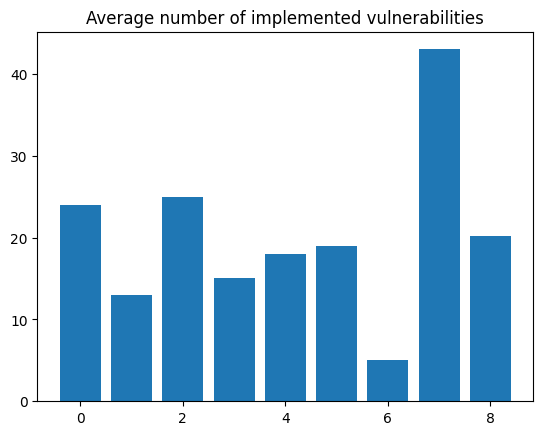

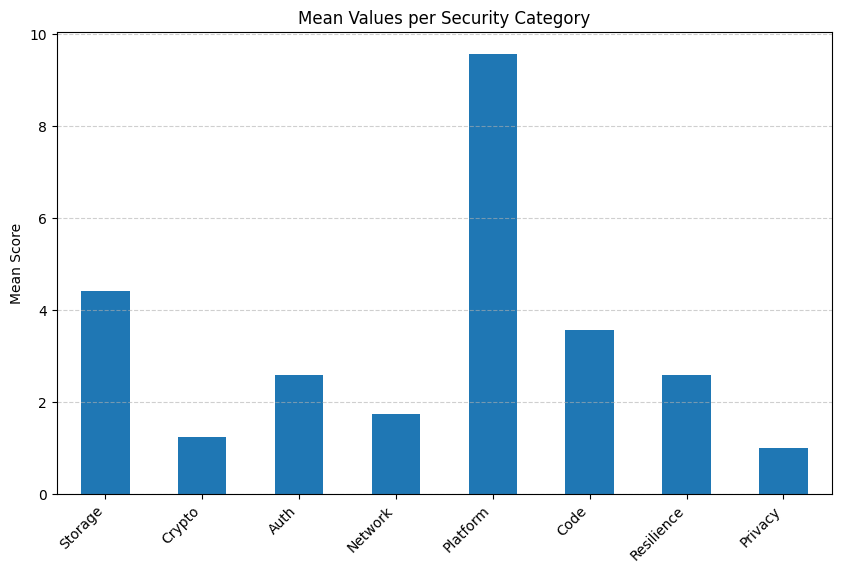

In [35]:
# Do some basic data exploration on "overview_df"
overview_df.describe()

print(overview_df["Storage"].mean())

# Compute means for numeric columns only
mean_row = overview_df.select_dtypes(include=[np.number]).mean()

# Add a label for the row
mean_row['App Name'] = 'Mean'

# Append to the DataFrame
overview_df = pd.concat([overview_df, pd.DataFrame([mean_row])], ignore_index=True)

display(overview_df)

plt.bar(overview_df.index, overview_df["Vulnerabilities"])
plt.title("Average number of implemented vulnerabilities")


# Select the mean row
mean_row = overview_df[overview_df['App Name'] == 'Mean'].select_dtypes('number').iloc[0]
mean_row = mean_row.drop('Vulnerabilities', errors='ignore')  # ignore in case it's missing

# Plot
plt.figure(figsize=(10,6))
mean_row.plot(kind='bar')

plt.title('Mean Values per Security Category')
plt.ylabel('Mean Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
#vuln_agg = overview_df.groupby("Vulnerabilities")
#vuln_agg.mean(numeric_only=True)

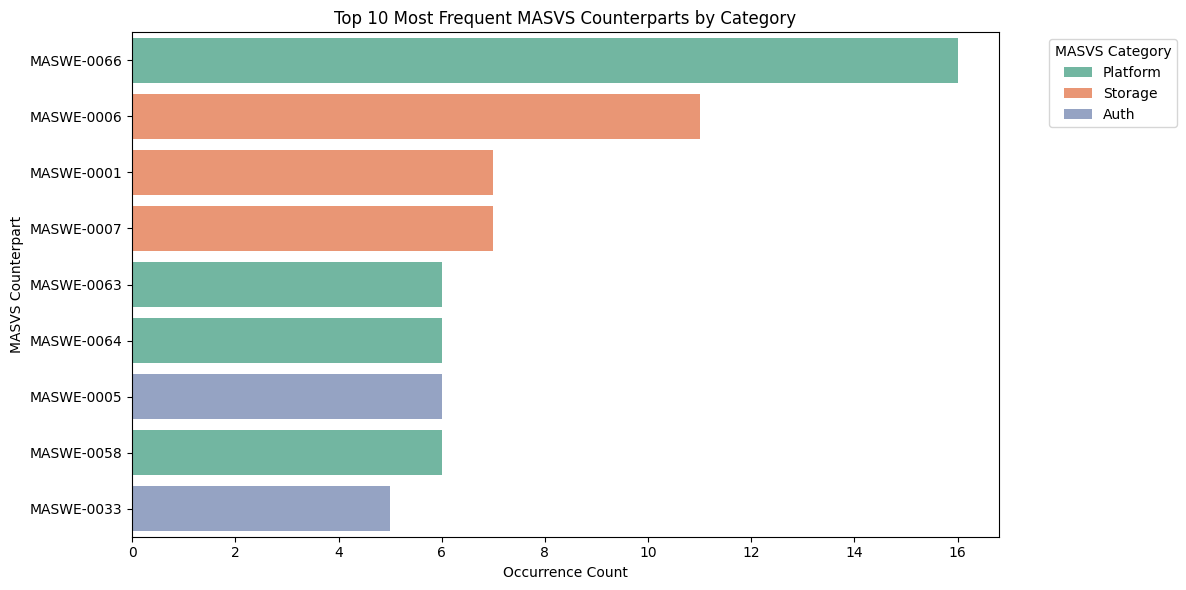

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Count the 10 most frequent MASVS Counterparts
top_10 = specific_df['MASVS Counterpart'].value_counts().head(10).reset_index()
top_10.columns = ['MASVS Counterpart', 'Count']

# Step 2: Map each counterpart to its MASVS Category
# Use the first occurrence (assuming category is consistent)
category_map = specific_df.drop_duplicates(subset=['MASVS Counterpart'])[['MASVS Counterpart', 'MASVS Category']]
top_10 = top_10.merge(category_map, on='MASVS Counterpart', how='left')

# Step 3: Shorten labels for readability (only for the plot)
top_10['Short Label'] = top_10['MASVS Counterpart'].str.extract(r'(MASWE-\d+)')

# Step 4: Plot with Seaborn and color by MASVS Category
plt.figure(figsize=(12,6))
sns.barplot(
    y='Short Label', 
    x='Count', 
    data=top_10, 
    hue='MASVS Category',   # color by category
    dodge=False,            # keep single bar per label
    palette='Set2'
)

plt.title('Top 10 Most Frequent MASVS Counterparts by Category')
plt.xlabel('Occurrence Count')
plt.ylabel('MASVS Counterpart')
plt.legend(title='MASVS Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


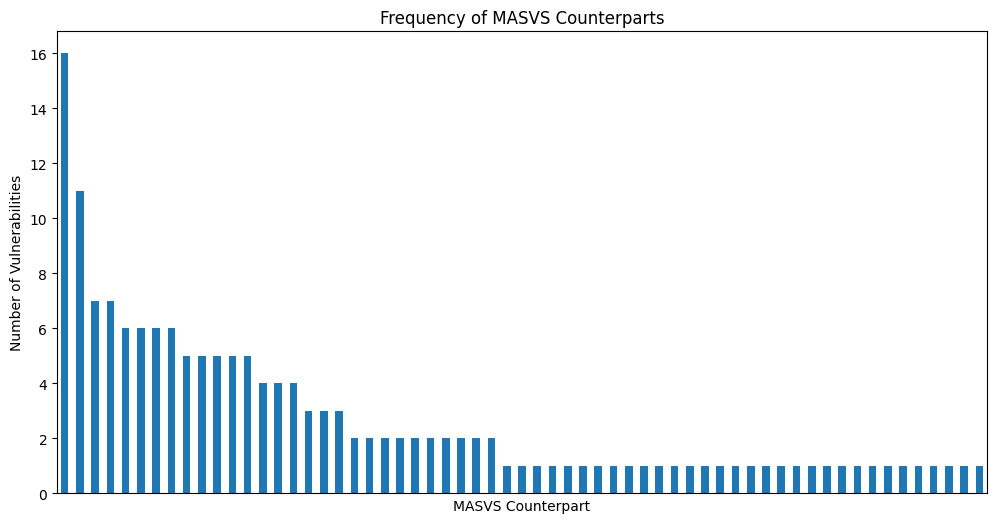

In [37]:
import matplotlib.pyplot as plt

# Count occurrences
counts = specific_df['MASVS Counterpart'].value_counts()

plt.figure(figsize=(12,6))
counts.plot(kind='bar')
plt.title('Frequency of MASVS Counterparts')
plt.ylabel('Number of Vulnerabilities')
plt.xlabel('MASVS Counterpart')
plt.xticks([], [])  # optionally hide x labels if too long
plt.show()


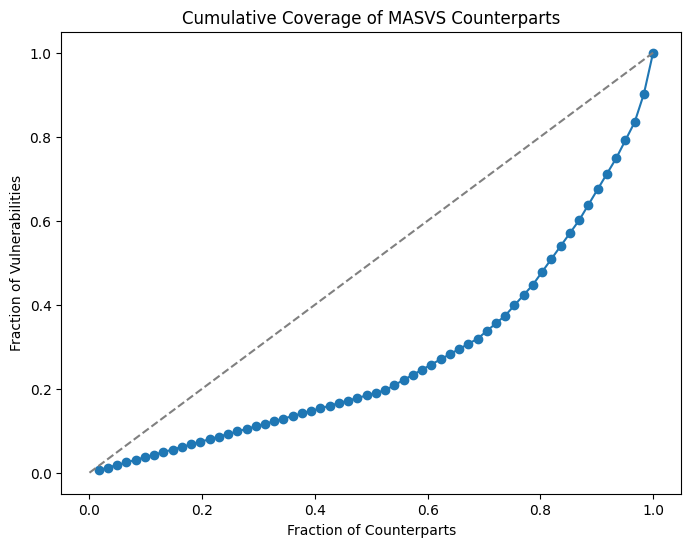

In [38]:
import numpy as np

counts_sorted = np.sort(specific_df['MASVS Counterpart'].value_counts().values)
cumulative = np.cumsum(counts_sorted) / counts_sorted.sum()
x = np.arange(1, len(cumulative)+1) / len(cumulative)

plt.figure(figsize=(8,6))
plt.plot(x, cumulative, marker='o')
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # line of equality
plt.title('Cumulative Coverage of MASVS Counterparts')
plt.xlabel('Fraction of Counterparts')
plt.ylabel('Fraction of Vulnerabilities')
plt.show()
